In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# https://www.kaggle.com/uciml/autompg-dataset

In [3]:
def load_data(filename):
    """ Load dataset from filename
    Args:
        filename (string): Path to data
        
    Returns:
        df (DataFrame): Dataset from file
    """
    
    df = pd.read_csv(filename)
    df.drop(df.columns[0], axis=1, inplace=True)
    
    return df

filename = 'autodf.csv'
df = load_data(filename)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Correlation

In [6]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


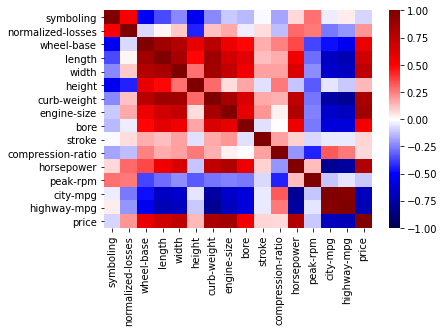

In [7]:
ax = sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='seismic')

# Histograms

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

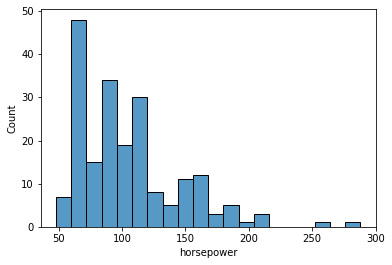

In [8]:
#sns.histplot(df[['horsepower','drive-wheels']],x='horsepower',bins=20,hue='drive-wheels')
sns.histplot(df,x='horsepower',bins=20)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

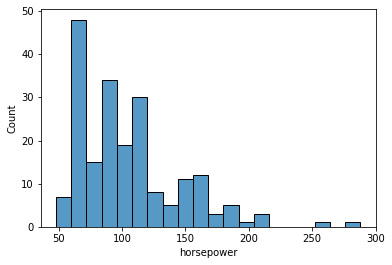

In [9]:
sns.histplot(df[['horsepower']],x='horsepower',bins=20)

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

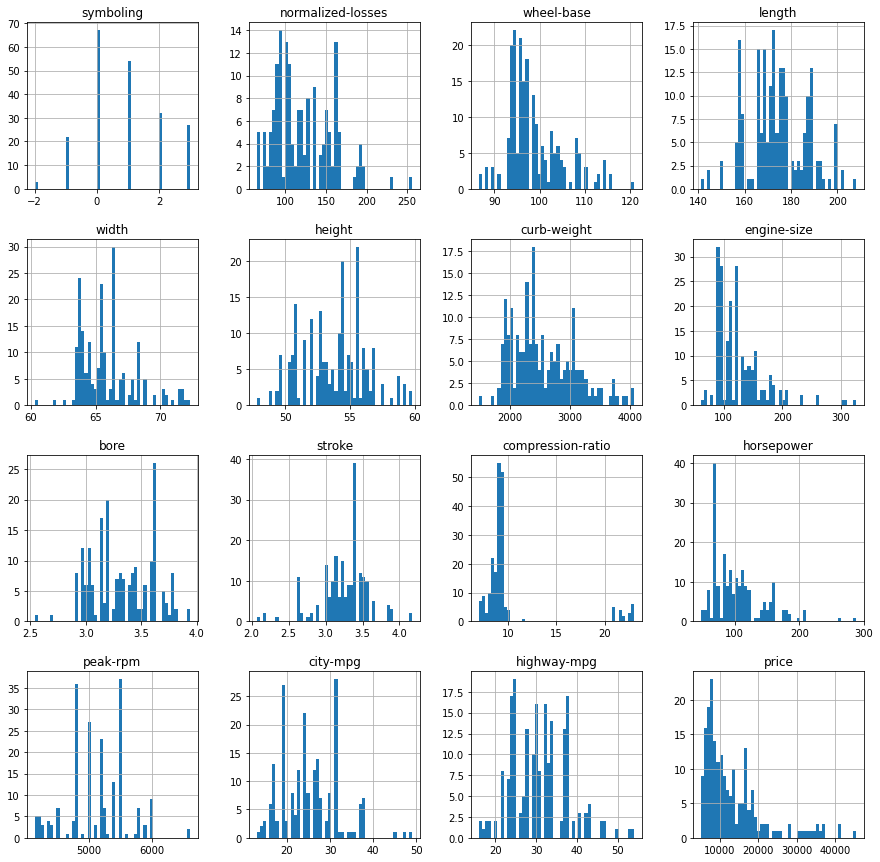

In [10]:
df.hist(figsize=(15,15),bins=50)

In [11]:
df_r = df[['drive-wheels','horsepower','engine-size','length', 'width', 'height','curb-weight','city-mpg']]
df_r

,drive-wheels,horsepower,engine-size,length,width,height,curb-weight,city-mpg
0,rwd,111.0,130,168.8,64.1,48.8,2548,21
1,rwd,111.0,130,168.8,64.1,48.8,2548,21
2,rwd,154.0,152,171.2,65.5,52.4,2823,19
3,fwd,102.0,109,176.6,66.2,54.3,2337,24
4,4wd,115.0,136,176.6,66.4,54.3,2824,18
...,...,...,...,...,...,...,...,...
200,rwd,114.0,141,188.8,68.9,55.5,2952,23
201,rwd,160.0,141,188.8,68.8,55.5,3049,19
202,rwd,134.0,173,188.8,68.9,55.5,3012,18
203,rwd,106.0,145,188.8,68.9,55.5,3217,26


In [12]:
y = df_r['city-mpg'].values

# drop target
df_r = df_r.drop('city-mpg',axis=1)
df_r

,drive-wheels,horsepower,engine-size,length,width,height,curb-weight
0,rwd,111.0,130,168.8,64.1,48.8,2548
1,rwd,111.0,130,168.8,64.1,48.8,2548
2,rwd,154.0,152,171.2,65.5,52.4,2823
3,fwd,102.0,109,176.6,66.2,54.3,2337
4,4wd,115.0,136,176.6,66.4,54.3,2824
...,...,...,...,...,...,...,...
200,rwd,114.0,141,188.8,68.9,55.5,2952
201,rwd,160.0,141,188.8,68.8,55.5,3049
202,rwd,134.0,173,188.8,68.9,55.5,3012
203,rwd,106.0,145,188.8,68.9,55.5,3217


# Ecoding categorical values
- Label Encoding
- One-hot Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

dw_cat = df_r['drive-wheels']
dw_cat.values

array(['rwd', 'rwd', 'rwd', 'fwd', '4wd', 'fwd', 'fwd', 'fwd', 'fwd',
       '4wd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd',
       'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'rwd', 'fwd',
       'fwd', 'rwd', 'rwd', 'rwd', 'rwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'rwd', 'rwd', 'rwd', 'rwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'fwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd',
       'rwd', 'rwd', 'rwd', 'rwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd',
       'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'rwd', 'rwd', 'rwd', 'rwd',
       'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd', 'rwd',
       'rwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd', 'rwd', 'rwd',
       'rwd', 'rwd',

In [14]:
# create new label encoder instance and enconde cat data
encoder = LabelEncoder()
dw_cat_encoded = encoder.fit_transform(dw_cat)
dw_cat_encoded

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [15]:
print(encoder.classes_)

['4wd' 'fwd' 'rwd']


In [16]:
dw_cat_encoded.shape

(205,)

In [17]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
dw_onehot_encoded = onehot_encoder.fit_transform(dw_cat_encoded.reshape(-1,1))
# sparse matrix
dw_onehot_encoded

<205x3 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in Compressed Sparse Row format>

In [18]:
# dense matrix
dw_onehot_encoded.toarray()[0:15,:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [19]:
# perform label encoding and one-hot encoding in a single step
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
dw_lb_encoded = lb_encoder.fit_transform(dw_cat)

print(lb_encoder.classes_)
print()
dw_lb_encoded[0:10,:]

['4wd' 'fwd' 'rwd']



array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [20]:
df_r_encoded = pd.concat([df_r, 
                          pd.DataFrame(data=dw_lb_encoded, columns=lb_encoder.classes_)],axis=1)
df_r_encoded.head()

,drive-wheels,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,rwd,111.0,130,168.8,64.1,48.8,2548,0,0,1
1,rwd,111.0,130,168.8,64.1,48.8,2548,0,0,1
2,rwd,154.0,152,171.2,65.5,52.4,2823,0,0,1
3,fwd,102.0,109,176.6,66.2,54.3,2337,0,1,0
4,4wd,115.0,136,176.6,66.4,54.3,2824,1,0,0


In [21]:
df_r_encoded.drop('drive-wheels',axis=1,inplace=True)
df_r_encoded.head()

,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,111.0,130,168.8,64.1,48.8,2548,0,0,1
1,111.0,130,168.8,64.1,48.8,2548,0,0,1
2,154.0,152,171.2,65.5,52.4,2823,0,0,1
3,102.0,109,176.6,66.2,54.3,2337,0,1,0
4,115.0,136,176.6,66.4,54.3,2824,1,0,0


# Imputation

In [22]:
#df_r_encoded.loc[0:5,'horsepower']
df_r_encoded.loc[0:5,'horsepower'] = np.nan
df_r_encoded

,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,NaN,130,168.8,64.1,48.8,2548,0,0,1
1,NaN,130,168.8,64.1,48.8,2548,0,0,1
2,NaN,152,171.2,65.5,52.4,2823,0,0,1
3,NaN,109,176.6,66.2,54.3,2337,0,1,0
4,NaN,136,176.6,66.4,54.3,2824,1,0,0
...,...,...,...,...,...,...,...,...,...
200,114.0,141,188.8,68.9,55.5,2952,0,0,1
201,160.0,141,188.8,68.8,55.5,3049,0,0,1
202,134.0,173,188.8,68.9,55.5,3012,0,0,1
203,106.0,145,188.8,68.9,55.5,3217,0,0,1


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df_r_encoded)

X = imputer.transform(df_r_encoded)

df_r_inputed = pd.DataFrame(X, columns=df_r_encoded.columns,index=df_r_encoded.index)
df_r_inputed

,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,95.0,130.0,168.8,64.1,48.8,2548.0,0.0,0.0,1.0
1,95.0,130.0,168.8,64.1,48.8,2548.0,0.0,0.0,1.0
2,95.0,152.0,171.2,65.5,52.4,2823.0,0.0,0.0,1.0
3,95.0,109.0,176.6,66.2,54.3,2337.0,0.0,1.0,0.0
4,95.0,136.0,176.6,66.4,54.3,2824.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
200,114.0,141.0,188.8,68.9,55.5,2952.0,0.0,0.0,1.0
201,160.0,141.0,188.8,68.8,55.5,3049.0,0.0,0.0,1.0
202,134.0,173.0,188.8,68.9,55.5,3012.0,0.0,0.0,1.0
203,106.0,145.0,188.8,68.9,55.5,3217.0,0.0,0.0,1.0


# Custom transformers

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

horsepower_idx, engine_size_idx, length_idx, width_idx, height_idx, curb_weight_idx = 0,1,2,3,4,5


class CombineAttributes(BaseEstimator, TransformerMixin):
    """
    """
    def __init__(self, add_volume=False):
        self.add_volume = add_volume

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        hp_to_weight_ratio = X[:,horsepower_idx]/X[:,curb_weight_idx]
        
        if self.add_volume:
            volume = X[:,length_idx]*X[:,width_idx]*X[:,height_idx]
            return np.c_[X, hp_to_weight_ratio, volume]
        
        else:
            return np.c_[X, hp_to_weight_ratio]


combine_attributes = CombineAttributes(add_volume=True)
df_r_combined = combine_attributes.transform(df_r_inputed.values)

In [25]:
print(df_r_combined[0,:])

[9.50000000e+01 1.30000000e+02 1.68800000e+02 6.41000000e+01
 4.88000000e+01 2.54800000e+03 0.00000000e+00 0.00000000e+00
 1.00000000e+00 3.72841444e-02 5.28019904e+05]


# Feature Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_r_combined)
print(scaler.transform(df_r_combined))

[[0.19583333 0.26037736 0.41343284 ... 1.         0.26435413 0.19162062]
 [0.19583333 0.26037736 0.41343284 ... 1.         0.26435413 0.19162062]
 [0.19583333 0.34339623 0.44925373 ... 1.         0.20901003 0.34306472]
 ...
 [0.35833333 0.42264151 0.7119403  ... 1.         0.37413667 0.68465406]
 [0.24166667 0.31698113 0.7119403  ... 1.         0.19831013 0.68465406]
 [0.275      0.30188679 0.7119403  ... 1.         0.26353775 0.68465406]]


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_r_combined)
df_x = scaler.transform(df_r_combined)
print(df_x)
df_x

[[-0.216776    0.07444893 -0.42652147 ...  1.30283093 -0.26921018
  -1.14419531]
 [-0.216776    0.07444893 -0.42652147 ...  1.30283093 -0.26921018
  -1.14419531]
 [-0.216776    0.60404617 -0.23151305 ...  1.30283093 -0.65166129
  -0.39267042]
 ...
 [ 0.7758495   1.10957081  1.19854871 ...  1.30283093  0.48943349
   1.30242947]
 [ 0.06319529  0.43553795  1.19854871 ...  1.30283093 -0.72560213
   1.30242947]
 [ 0.26681078  0.33924755  1.19854871 ...  1.30283093 -0.27485177
   1.30242947]]


array([[-0.216776  ,  0.07444893, -0.42652147, ...,  1.30283093,
        -0.26921018, -1.14419531],
       [-0.216776  ,  0.07444893, -0.42652147, ...,  1.30283093,
        -0.26921018, -1.14419531],
       [-0.216776  ,  0.60404617, -0.23151305, ...,  1.30283093,
        -0.65166129, -0.39267042],
       ...,
       [ 0.7758495 ,  1.10957081,  1.19854871, ...,  1.30283093,
         0.48943349,  1.30242947],
       [ 0.06319529,  0.43553795,  1.19854871, ...,  1.30283093,
        -0.72560213,  1.30242947],
       [ 0.26681078,  0.33924755,  1.19854871, ...,  1.30283093,
        -0.27485177,  1.30242947]])

# Split Train and Test data 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.3, random_state=42)

# Simple Model

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train,y_train)

0.7952344335825491

In [30]:
y_predict = lin_reg.predict(X_test)
y_predict

array([17.34457405, 14.63765682, 25.38855774, 22.7691086 , 19.43790156,
       31.01180312, 33.03293496, 30.64927696, 25.56952368, 33.57372401,
       23.39187094, 29.98829994, 22.50766985, 25.88324929, 16.46123728,
       33.80894671, 39.55362521, 19.67645898, 26.3614092 , 25.56962504,
       27.25392767, 19.7894859 , 31.48274597, 36.1534153 , 32.06723703,
       16.23423089, 21.951665  , 22.09051651, 30.34615891, 21.88918034,
       19.79155099, 32.02675455, 28.76681289, 20.28088419, 25.46903483,
       19.59570313, 19.95275204, 23.87542209, 31.81769568, 19.85709818,
       27.42416382, 27.82308488, 23.27673457, 32.63147904, 31.17797387,
       27.72049022, 32.02675455, 31.58763682, 22.50636939, 19.61929127,
       31.68313357, 17.46449129, 34.45597581, 26.08152783, 30.32992541,
       25.06345984, 21.96132729, 23.87542209, 14.55199155, 31.8858294 ,
       24.10135279, 19.021305  ])

In [31]:
from sklearn.metrics import mean_squared_error

y_predicted = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.7120363286897495

In [43]:
from sklearn.ensemble import RandomForestRegressor

# use a Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_predicted = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_predicted)
forest_mse = np.sqrt(forest_mse)
forest_mse

3.2973667328593796

In [37]:
forest_reg.score(X_train, y_train)

0.9757188895393509

In [42]:
forest_reg.score(X_test,y_test)

0.8171028361012285

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, df_x, y,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

In [ ]:
rmse_scores.mean()

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 12
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # 6
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_x, y)

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

# Randomized Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=9),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_x, y)

In [ ]:
rnd_search.best_estimator_

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)